In [312]:
import numpy as np
import os
import pandas as pd
import csv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
from sklearn.manifold import MDS

In [199]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'];


### load data (Only taking data_batch_1 for now for all training to limit training time)

In [132]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [269]:
data_batch_1 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_1")
data_batch_2 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_2")
data_batch_3 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_3")
data_batch_4 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_4")
data_batch_5 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_5")
test_batch = unpickle("C:/Users/titus/Documents/CS498/hw3/test_batch")


In [5]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [69]:
data_batch_1[b'data'].shape

(10000, 3072)

In [70]:
print(data_batch_1)

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

### 1a: Mean image 

In [143]:
sum_mean = np.zeros((10,3072))
count = np.zeros(10)
#sum over all the image data for each category 
for i in range (0, 10000):
    sum_mean[data_batch_1[b'labels'][i]] += data_batch_1[b'data'][i]
    count[data_batch_1[b'labels'][i]] += 1

In [223]:
print(count)

[ 1005.   974.  1032.  1016.   999.   937.  1030.  1001.  1025.   981.]


In [144]:
#devide by the number of picture it has in that category to get the mean image 
for i in range (0, 10):
    mean[i]=sum_mean[i]/count[i]

In [145]:
print(mean[4])

[ 105.94794795  105.63963964  106.26226226 ...,  101.16116116  100.91991992
  101.48148148]


In [146]:
mean.shape

(10, 3072)

In [147]:
print(data_batch_1[b'labels'][2])

9


In [272]:
%matplotlib inline

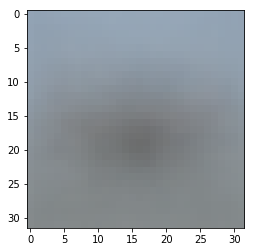

In [276]:
image = np.reshape(mean[0],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

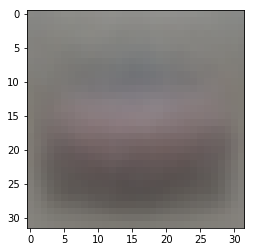

In [277]:
image = np.reshape(mean[1],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

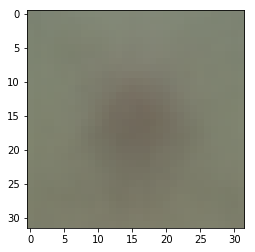

In [278]:
image = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

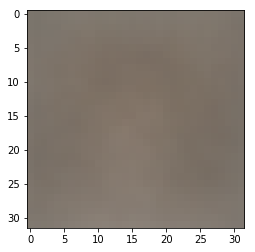

In [279]:
image = np.reshape(mean[3],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

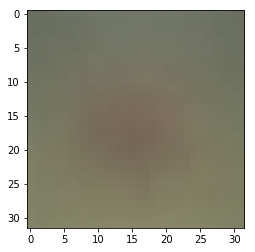

In [280]:
image = np.reshape(mean[4],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

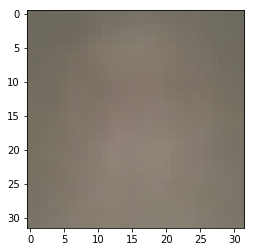

In [281]:
image = np.reshape(mean[5],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

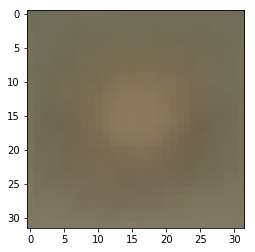

In [282]:
image = np.reshape(mean[6],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

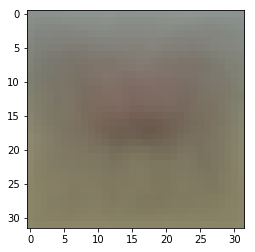

In [283]:
image = np.reshape(mean[7],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

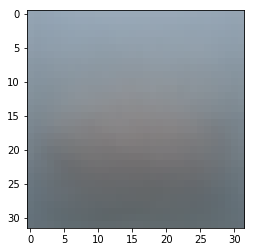

In [284]:
image = np.reshape(mean[8],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

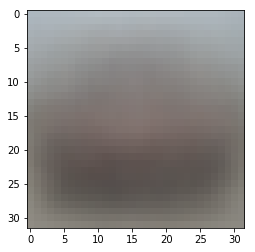

In [285]:
image = np.reshape(mean[9],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

### 1b first 20 principal components

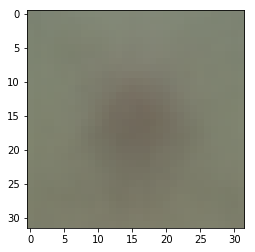

In [316]:
im = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(im)
pyplot.show()



In [317]:
data_by_labels = [] #storing the image by labels, the list would be in this structure: data_by_labels[labes][row number of image][image data array]
for i in range (0,10):
    data_by_labels.append(np.zeros((int(count[i]), 3072)))

In [318]:
len(data_by_labels[1])

974

In [319]:
temp_count_loop = np.zeros(10) #for counting row number in each cateogry for the list for adding the image data to data_by_labels
print(temp_count_loop)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [320]:
print(data_by_labels[1][6])

[ 0.  0.  0. ...,  0.  0.  0.]


In [321]:
#move data from batch to data_by_labels so data is now by labels for PCA training
for i in range (0,5000):
    data_by_labels[data_batch_1[b'labels'][i]][int(temp_count_loop[data_batch_1[b'labels'][i]])] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_1[b'labels'][i]] += 1

In [322]:
#fit pca on each labels
pca_objs = [PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20)]
for i in range(0,10):
    pca_objs[i].fit(data_by_labels[i])


In [323]:
print(pca_objs)

[PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_compone

In [324]:
# apply pca on one image and show it 

apply_pca = pca_objs[7].transform(data_batch_1[b'data'][11])
apply_pca_2 = pca_objs[7].inverse_transform(apply_pca)


C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [267]:
apply_pca_3 = np.reshape(apply_pca_2,(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(apply_pca_3)
pyplot.show()

In [271]:
#show the orgainl image and the category number
image = np.reshape(data_batch_1[b'data'][4],(3,32,32)).transpose(1,2,0).astype('uint8')
print(data_batch_1[b'labels'][4])
plt.imshow(image)
pyplot.show()

1


In [268]:
print(pca_objs[1].explained_variance_)  

[ 11955735.92921267    805415.45963859    618667.25150961
    227160.46109246    211231.18905514    186837.53517248
    174414.11108192    163352.99502279    139478.18930642
    131801.37675772    110079.3732126      92540.80491373
     83997.95160768     79698.21175832     66067.83878165
     58419.76169323     55388.83513874     54031.696714       49322.71805539
     47139.68651908]


the error is the amount of variation not explained by a principal component which will we equal to pc1 eigen value divided by sum of all the eigen values ???
https://piazza.com/class/jchzguhsowz6n9?cid=489

### 2:  distances between mean image

In [329]:
#euclidean_distances(np.reshape(mean[0],(3,1024)),np.reshape(mean[1],(3,1024)))
paired_distances(mean[1],mean[0])


C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1716.56209604])

In [330]:
euc_dis = np.zeros((10,10))        
for i in range(0,10):
    for j in range(0,10):
        #euc_dis[i][j] = euclidean_distances(pca_objs[i].explained_variance_,pca_objs[j].explained_variance_)
        euc_dis[i][j] = euclidean_distances(mean[i],mean[j])

C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

In [331]:
print(euc_dis)

[[  0.00000000e+00   1.71656210e+03   1.63418564e+03   1.94296717e+03
    2.17508564e+03   2.04391884e+03   2.52843765e+03   1.67291485e+03
    9.13578218e+02   1.46019843e+03]
 [  1.71656210e+03   0.00000000e+00   8.79660011e+02   9.88844039e+02
    1.15541702e+03   1.23232824e+03   1.23855254e+03   9.33944417e+02
    1.31020094e+03   1.06742375e+03]
 [  1.63418564e+03   8.79660011e+02   2.11431983e-04   5.47389328e+02
    6.15700015e+02   7.44324302e+02   9.76240119e+02   4.58222699e+02
    1.53888416e+03   1.51262904e+03]
 [  1.94296717e+03   9.88844039e+02   5.47389328e+02   0.00000000e+00
    4.92409186e+02   4.19860843e+02   6.99141868e+02   6.61838440e+02
    1.82766963e+03   1.76034408e+03]
 [  2.17508564e+03   1.15541702e+03   6.15700015e+02   4.92409186e+02
    3.45266983e-04   5.91303051e+02   5.20300621e+02   7.51705551e+02
    2.06503944e+03   1.95747247e+03]
 [  2.04391884e+03   1.23232824e+03   7.44324302e+02   4.19860843e+02
    5.91303051e+02   2.72957517e-04   8.21902

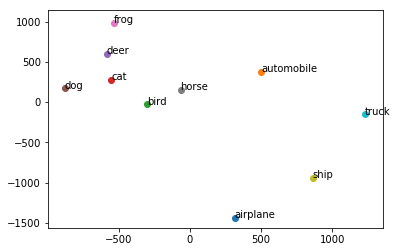

In [332]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(euc_dis)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

### 3  average error obtained by PCA

For class A and class B, define E(A | B) to be the average error obtained by representing all the images of class A using the mean of class A and the first 20 principal components of class B. Now define the similarity between classes to be (1/2)(E(A | B) + E(B | A)). If A and B are very similar, then this error should be small, because A's principal components should be good at representing B.